<a href="https://colab.research.google.com/github/zinebbnz/INF8601/blob/main/Transformee%20DCT%20et%20quantification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de transformée de cosinus discrète et de quantification

Exécuter les 2 lignes suivantes pour colab.

In [10]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 568, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 568 (delta 28), reused 11 (delta 2), pack-reused 494 (from 1)
Receiving objects: 100% (568/568), 57.80 MiB | 31.13 MiB/s, done.
Resolving deltas: 100% (276/276), done.
/content/INF8770/INF8770


In [11]:
import numpy as np
import scipy.fftpack as dctpack
from skimage import io
import matplotlib.pyplot as plt

Lecture d'une image

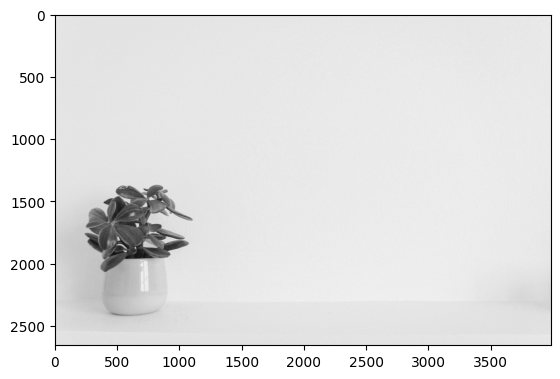

In [12]:
img = io.imread('/content/INF8770/images/pexels-andreea-ch-371539-1166644(2).jpg', as_gray=True)*255
plt.imshow(img,cmap = plt.get_cmap('gray'))
plt.show()

On prélève le premier bloc de l'image et on applique la DCT sur ce bloc.

In [13]:
BlocImage = img[0:8,0:8]
BlocDCT = np.zeros((8,8))
print('Bloc de image:\n',BlocImage,'\n')

#On soustrait 128 pour avoir en signal oscillant autour de zéro
BlocImage = BlocImage - 128
#DCT en 2 étapes. La DCT est une transformation séparable. On peut appliquer en X et ensuite en Y.
BlocDCT = dctpack.dct(dctpack.dct(BlocImage, axis=0, norm='ortho'), axis=1, norm='ortho')
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
print('Bloc après DCT:\n',BlocDCT)

Bloc de image:
 [[229. 228. 227. 227. 228. 230. 232. 234.]
 [229. 228. 228. 228. 228. 230. 232. 233.]
 [229. 229. 228. 228. 229. 230. 232. 233.]
 [229. 229. 229. 230. 230. 231. 231. 232.]
 [229. 230. 230. 231. 231. 231. 231. 231.]
 [230. 230. 231. 232. 232. 232. 231. 230.]
 [230. 231. 232. 233. 233. 232. 230. 230.]
 [230. 231. 232. 233. 233. 232. 230. 229.]] 

Bloc après DCT:
 [[818.88  -6.01   0.16   0.05   0.37  -0.09   0.07  -0.58]
 [ -5.89  -5.83   8.22  -0.38   0.06   0.35  -0.06   0.14]
 [  0.07   0.33   0.27   0.15   0.07  -0.06   0.32   0.2 ]
 [  0.34  -0.14  -0.17   0.21   0.08   0.2    0.17  -0.05]
 [ -0.37  -0.12  -0.16  -0.01   0.12  -0.31  -0.07  -0.28]
 [  0.34  -0.2    0.13   0.03   0.42  -0.56   0.22  -0.14]
 [ -0.16  -0.29   0.57   0.53  -0.16  -0.04  -0.27   0.28]
 [  0.01  -0.04   0.43  -0.35  -0.04  -0.63  -0.51   0.17]]


Quantification et calcul des erreurs causées par celle-ci.

In [14]:
Quant1= np.matrix('16 11 10 16 24 40 51 61;\
    12 12 14 19 26 58 60 55;\
    14 13 16 24 40 57 69 56;\
    14 17 22 29 51 87 80 62;\
    18 22 37 56 68 109 103 77;\
    24 35 55 64 81 104 103 92;\
    49 64 78 77 103 121 120 101;\
    72 92 95 98 112 100 103 99').astype('float')

BlocQuant1 = np.round(np.divide(BlocDCT, Quant1))
print('Bloc quantifié:\n',BlocQuant1,'\n')

#Quantification et transformation inverse
BlocDCTavecP1 = np.multiply(BlocQuant1,Quant1)
BlocImageavecP1 = dctpack.idct(dctpack.idct(BlocDCTavecP1, axis=0, norm='ortho'), axis=1, norm='ortho') + 128
print('Bloc image reconstruit:\n',BlocImageavecP1,'\n')

BlocImage = BlocImage + 128
print('Erreurs dues à la quantification:\n',np.abs(BlocImageavecP1-BlocImage))

Bloc quantifié:
 [[51. -1.  0.  0.  0. -0.  0. -0.]
 [-0. -0.  1. -0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0. -0.  0.  0.]
 [ 0. -0. -0.  0.  0.  0.  0. -0.]
 [-0. -0. -0. -0.  0. -0. -0. -0.]
 [ 0. -0.  0.  0.  0. -0.  0. -0.]
 [-0. -0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0. -0. -0. -0. -0.  0.]] 

Bloc image reconstruit:
 [[231.26 229.7  227.61 226.45 227.21 229.77 232.93 235.08]
 [230.78 229.5  227.81 226.93 227.69 229.97 232.73 234.6 ]
 [229.89 229.13 228.18 227.82 228.58 230.34 232.36 233.7 ]
 [228.72 228.64 228.66 228.99 229.75 230.82 231.88 232.54]
 [227.46 228.12 229.18 230.25 231.01 231.34 231.36 231.28]
 [226.3  227.64 229.66 231.42 232.18 231.82 230.87 230.11]
 [225.4  227.27 230.03 232.31 233.07 232.19 230.5  229.22]
 [224.92 227.07 230.23 232.79 233.55 232.39 230.3  228.74]] 

Erreurs dues à la quantification:
 [[2.26 1.7  0.61 0.55 0.79 0.23 0.93 1.08]
 [1.78 1.5  0.19 1.07 0.31 0.03 0.73 1.6 ]
 [0.89 0.13 0.18 0.18 0.42 0.34 0.36 0.7 ]
 [0.28 0.36 0.34 1.01 0.25 0.18 0.88

Si on quantifie plus, les erreurs seront plus grandes. Exemple.

In [15]:
Quant2 = np.matrix('53 37 33 53 80 133 170 203;\
    40 40 47 63 87 193 200 183;\
    47 43 53 80 133 190 230 187;\
    47 57 73 97 170 290 267 207;\
    60 73 123 187 227 363 343 257;\
    80 117 183 213 270 347 377 307;\
    163 213 260 290 343 403 400 337;\
    240 307 317 327 373 333 343 300').astype('float')

BlocQuant2 = np.round(np.divide(BlocDCT, Quant2))
print('Bloc quantifié:\n',BlocQuant2,'\n')

#Quantification et transformation inverse
BlocDCTavecP2 = np.multiply(BlocQuant2,Quant2)
BlocImageavecP2 = dctpack.idct(dctpack.idct(BlocDCTavecP2, axis=0, norm='ortho'), axis=1, norm='ortho') + 128
print('Bloc image reconstruit:\n',BlocImageavecP2,'\n')

print('Erreurs dues à la quantification:\n',np.abs(BlocImageavecP2-BlocImage))

Bloc quantifié:
 [[15. -0.  0.  0.  0. -0.  0. -0.]
 [-0. -0.  0. -0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0. -0.  0.  0.]
 [ 0. -0. -0.  0.  0.  0.  0. -0.]
 [-0. -0. -0. -0.  0. -0. -0. -0.]
 [ 0. -0.  0.  0.  0. -0.  0. -0.]
 [-0. -0.  0.  0. -0. -0. -0.  0.]
 [ 0. -0.  0. -0. -0. -0. -0.  0.]] 

Bloc image reconstruit:
 [[227.38 227.38 227.38 227.38 227.38 227.38 227.38 227.38]
 [227.38 227.38 227.38 227.38 227.38 227.38 227.38 227.38]
 [227.38 227.38 227.38 227.38 227.38 227.38 227.38 227.38]
 [227.38 227.38 227.38 227.38 227.38 227.38 227.38 227.38]
 [227.38 227.38 227.38 227.38 227.38 227.38 227.38 227.38]
 [227.38 227.38 227.38 227.38 227.38 227.38 227.38 227.38]
 [227.38 227.38 227.38 227.38 227.38 227.38 227.38 227.38]
 [227.38 227.38 227.38 227.38 227.38 227.38 227.38 227.38]] 

Erreurs dues à la quantification:
 [[1.62 0.62 0.37 0.37 0.62 2.62 4.62 6.62]
 [1.62 0.62 0.62 0.62 0.62 2.62 4.62 5.63]
 [1.62 1.62 0.62 0.62 1.62 2.62 4.62 5.63]
 [1.62 1.62 1.62 2.62 2.62 3.63 3.63

DCT (kodim13) blocs 8x8 — S=1.0: PSNR=44.73 dB, SSIM=0.980


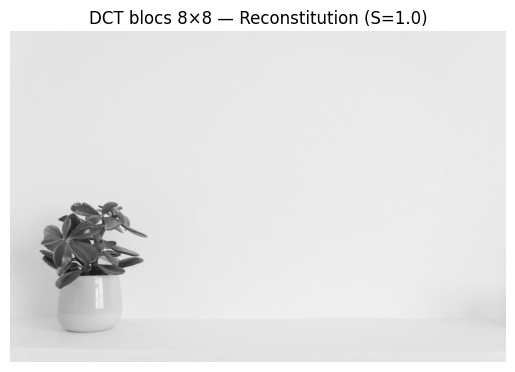

In [16]:
# ---- métriques ----
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# ---- utilitaires DCT/IDCT
def dct2(b):
    return dctpack.dct(dctpack.dct(b, axis=0, norm='ortho'), axis=1, norm='ortho')

def idct2(b):
    return dctpack.idct(dctpack.idct(b, axis=0, norm='ortho'), axis=1, norm='ortho')

# ---- matrice JPEG (Quant1) ----
Qjpeg = np.array([
 [16,11,10,16,24,40,51,61],
 [12,12,14,19,26,58,60,55],
 [14,13,16,24,40,57,69,56],
 [14,17,22,29,51,87,80,62],
 [18,22,37,56,68,109,103,77],
 [24,35,55,64,81,104,103,92],
 [49,64,78,77,103,121,120,101],
 [72,92,95,98,112,100,103,99]
], dtype=np.float32)

# ---- facteur d’échelle de quantification ----
S = 1.0
Qm = Qjpeg * S

# ---- préparation ----
img_f = img.astype(np.float32)
H, W = img_f.shape
B = 8

# ---- DCT + quantification bloc par bloc ----
coef_q = np.zeros_like(img_f)
for i in range(0, H, B):
    for j in range(0, W, B):
        patch = img_f[i:i+B, j:j+B] - 128.0
        c = dct2(patch)
        coef_q[i:i+B, j:j+B] = np.round(c / Qm)

# ---- déquantification + reconstruction ----
rec = np.zeros_like(img_f)
for i in range(0, H, B):
    for j in range(0, W, B):
        c_hat = coef_q[i:i+B, j:j+B] * Qm
        rec[i:i+B, j:j+B] = idct2(c_hat) + 128.0

rec = np.clip(rec, 0, 255)

# ---- qualité ----
psnr = peak_signal_noise_ratio(img_f, rec, data_range=255)
ssim = structural_similarity(img_f, rec, data_range=255)
print(f"DCT (kodim13) blocs 8x8 — S={S}: PSNR={psnr:.2f} dB, SSIM={ssim:.3f}")

# ---- affichage ----
plt.imshow(rec, cmap='gray')
plt.title(f"DCT blocs 8×8 — Reconstitution (S={S})")
plt.axis('off'); plt.show()


In [17]:
for S in [0.5, 1.0, 2.0, 4.0]:
    Qm = Qjpeg * S
    # quantif
    coef_q = np.zeros_like(img_f)
    for i in range(0, H, B):
        for j in range(0, W, B):
            c = dct2(img_f[i:i+B, j:j+B] - 128.0)
            coef_q[i:i+B, j:j+B] = np.round(c / Qm)
    # déquantif + recon
    rec = np.zeros_like(img_f)
    for i in range(0, H, B):
        for j in range(0, W, B):
            rec[i:i+B, j:j+B] = idct2(coef_q[i:i+B, j:j+B]*Qm) + 128.0
    rec = np.clip(rec, 0, 255)
    psnr = peak_signal_noise_ratio(img_f, rec, data_range=255)
    ssim = structural_similarity(img_f, rec, data_range=255)
    print(f"S={S:>3}: PSNR={psnr:6.2f} dB  SSIM={ssim:.3f}")


S=0.5: PSNR= 54.05 dB  SSIM=0.998
S=1.0: PSNR= 44.73 dB  SSIM=0.980
S=2.0: PSNR= 38.00 dB  SSIM=0.917
S=4.0: PSNR= 35.41 dB  SSIM=0.832


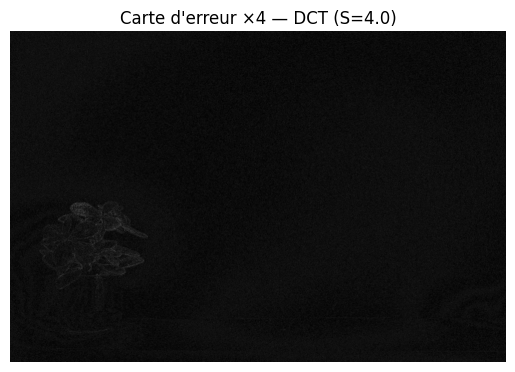

Erreur max: 67.90953   Erreur moy: 3.3628166


In [18]:
err = np.abs(img_f - rec)
plt.imshow(np.clip(err*4, 0, 255), cmap='gray')
plt.title(f"Carte d'erreur ×4 — DCT (S={S})"); plt.axis('off'); plt.show()
print("Erreur max:", err.max(), "  Erreur moy:", err.mean())
